In [126]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import scipy as sp 
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from math import pi
from math import sqrt
from math import exp
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [133]:
#-------------------------------------------------------------------------------
#inicjalizacja
#-------------------------------------------------------------------------------
S1 = np.array([[4, 2],[2, 4]]) #macierz kowariancji do losowania klas
S2 = np.array([[4, 2],[2, 2]])

m1 = np.array([-1,-1]) #średnie do losowania klas
m2 = np.array([2,2])

n1=30 # ilości obiektów w każdej klasie
n2=20

X1 = np.random.multivariate_normal(m1, S1, n1) #macierze klas
X2 = np.random.multivariate_normal(m2, S2, n2)
X = np.concatenate((X1,X2)) #macierz wszystkich punktów razem (potrzebna potem)   
Y = np.ones(n1+n2) #macierz numerów klas (czyli o której klasy należy dany punkt z macierzy C)
Y[n1:] = 2

In [134]:
#-------------------------------------------------------------------------------
#SVC
#-------------------------------------------------------------------------------

N_c = 10 #ile chcemy naszych c
deltaN_c = 0.1 #co ile zmieniamy
init_c = 0.1 #od jakiego zaczynamy

a_c = np.zeros(N_c) #nachylenie prostej dla danego c
b_c = np.zeros(N_c) #wyraz wolny dla danego c
C = np.zeros(N_c) #taki backup tych parametrów aby potem było łatwiej

clf_score = np.zeros(N_c)

for i in range (1,N_c+1):
    C[i-1] = init_c + (i-1)*deltaN_c
    clf = LinearSVC(C= C[i-1])
    clf.fit(X, Y)
    
    w = clf.coef_[0]
    a_c[i-1] = -w[0]/w[1]
    b_c[i-1] = -clf.intercept_[0] / w[1]
    clf_score[i-1] = clf.score(X,Y)

In [135]:
#-------------------------------------------------------------------------------
#LDA
#-------------------------------------------------------------------------------
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X,Y) 

w_lda = clf_lda.coef_[0]
a_lda = -w_lda[0]/w_lda[1]
b_lda = -clf_lda.intercept_[0] / w_lda[1]
lda_score = clf_lda.score(X,Y)



In [136]:
#-------------------------------------------------------------------------------
#porównanie obu metod:
#-------------------------------------------------------------------------------
print("LDA score = ",lda_score)
for i in range(1,N_c+1):
    print("SVM for C=",C[i-1]," score = ",clf_score[i-1])

LDA score =  0.84
SVM for C= 0.1  score =  0.84
SVM for C= 0.2  score =  0.84
SVM for C= 0.30000000000000004  score =  0.84
SVM for C= 0.4  score =  0.84
SVM for C= 0.5  score =  0.84
SVM for C= 0.6  score =  0.84
SVM for C= 0.7000000000000001  score =  0.84
SVM for C= 0.8  score =  0.84
SVM for C= 0.9  score =  0.84
SVM for C= 1.0  score =  0.84


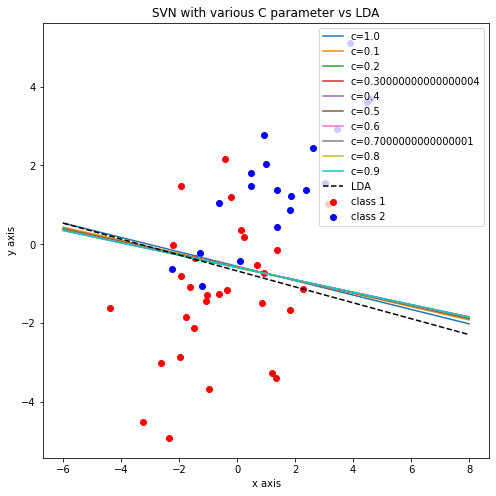

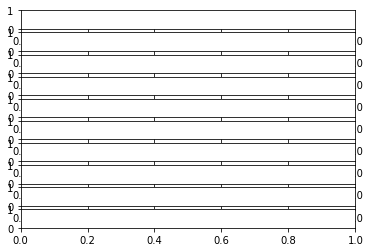

In [137]:
#-------------------------------------------------------------------------------
#wizualka
#-------------------------------------------------------------------------------


x = np.linspace(-6,8)


fig = plt.figure(figsize=(8, 8))
ax1, separationLine = plt.subplots(10) 

ax1 = fig.add_subplot(1,1,1 ) 
ax1.scatter(X1[:, 0], X1[:, 1], label='class 1', c='#ff0000') #seria 1
ax1.scatter(X2[:, 0], X2[:, 1], label='class 2', c='#0000ff') #seria 2
ax1.title.set_text("SVN with various C parameter vs LDA")
ax1.set_xlabel("x axis")
ax1.set_ylabel("y axis")


for i in range (0,N_c):
    y =  a_c[i]*x - b_c[i];
    Label = "c=" + str(C[i-1])
    separationLine[i] = ax1.plot(x, y,label=Label)
    
separationLineLDA = ax1.plot(x, a_lda*x - b_lda,'k--',label = 'LDA')
    
ax1.legend()

plt.show()
